# Lifefit Tutorial

In [3]:
# import modules
import lifefit as lf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn settings
sns.set_style('white')
sns.set_context("notebook")
sns.set(font='Arial')

# plot settings
def set_ticksStyle(x_size=4, y_size=4, x_dir='in', y_dir='in'):
    sns.set_style('ticks', {'xtick.major.size': x_size, 'ytick.major.size': y_size, 'xtick.direction': x_dir, 'ytick.direction': y_dir})

## Lifetime
First, define the path to the data

In [6]:
atto550_dna_path = 'data/lifetime/Atto550_DNA.txt'
irf_path = 'data/IRF/irf.txt'

Read the fluorescence and IRF decay and create a `Lifetime object`

In [10]:
atto550_dna, fluor_nsperchan = lf.read_decay(atto550_dna_path)
irf, irf_nsperchan = lf.read_decay(irf_path)

atto550_dna_life = lf.tcspc.Lifetime(atto550_dna, fluor_nsperchan, irf)

Fit the fluorecence decay by iterative reconvolution with the IRF

In [13]:
atto550_dna_life.reconvolution_fit([1,5])

Reconvolution fit with experimental IRF
tau0: 1.01 ± 0.01 ns (29%)
tau1: 3.89 ± 0.01 ns (71%)
mean tau: 3.61 ± 0.01 ns

irf shift: 0.11 ns
offset: 1 counts


Plot the IRF, the fluorescence decay and the fit

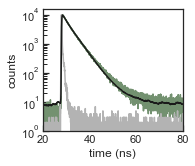

In [16]:
with sns.axes_style('ticks'):
    set_ticksStyle()
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.25), sharex=False, sharey=True, squeeze=False)
    
    ax[0,0].semilogy(atto550_dna_life.fluor[:,0], atto550_dna_life.fluor[:,2], color=[0.45, 0.57, 0.44])
    ax[0,0].semilogy(atto550_dna_life.irf[:,0], atto550_dna_life.irf[:,2], color=[0.7,0.7,0.7])
    ax[0,0].semilogy(atto550_dna_life.fluor[:,0], atto550_dna_life.fit_y, color='k')
    
    ax[0,0].set_ylabel('counts')
    ax[0,0].set_xlabel('time (ns)')
    ax[0,0].set_xlim((20,80))
    ax[0,0].set_ylim(bottom=1)

## Anisotropy
Read the four different fluorescence decays and generate a `lifetime object` from each channel

In [31]:
atto550_dna_path = {}
atto550_dna = {}
atto550_dna_life = {}
for c in ['VV','VH','HV','HH']:
    atto550_dna_path[c] = 'data/anisotropy/{}.txt'.format(c)
    atto550_dna[c], fluor_nsperchan = lf.read_decay(atto550_dna_path[c])
    atto550_dna_life[c] = lf.tcspc.Lifetime(atto550_dna[c], fluor_nsperchan, irf)

Compute an `anisotropy object` from the lifetime objects and fit a two-rotator model to the anisotropy decay

In [32]:
atto550_dna_aniso = lf.tcspc.Anisotropy(atto550_dna_life['VV'], atto550_dna_life['VH'], atto550_dna_life['HV'],atto550_dna_life['HH'])
atto550_dna_aniso.rotation_fit(p0=[0.4, 1, 10,1], model='two_rotations')

Anisotropy fit
model: two_rotations
r0: 0.19 ± 0.01 ns
b: 0.00 ± 0.02 ns
tau: 8.50 ± 0.45 ns
tau2: 1.57 ± 0.14 ns


Plot the anisotropy decay with the fit

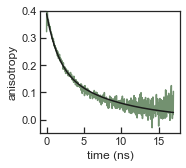

In [34]:
with sns.axes_style('ticks'):
    set_ticksStyle()
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.25), sharex=False, sharey=True, squeeze=False)
    
    ax[0,0].plot(atto550_dna_aniso.time, atto550_dna_aniso.r, color=[0.45, 0.57, 0.44])
    ax[0,0].plot(atto550_dna_aniso.time, atto550_dna_aniso.fit_r, color='k')
    ax[0,0].set_ylim((-0.05,0.4))
    ax[0,0].set_xlabel('time (ns)')
    ax[0,0].set_ylabel('anisotropy')